change the data into ethical /unhetical professions

add one hot encoding for all columns 
remove badges

In [1]:
import pandas as pd 
import numpy as np 

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import shap

In [2]:
data = pd.read_csv("pokemon_data.csv")

In [3]:
data.drop("ID", axis=1, inplace=True)

In [4]:
cols = ['City', 'Economic Status', 'Profession','Criminal Record', 'Charity Participation', 'Team Rocket']

df_processed = pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=cols, drop_first=True)

In [5]:
df_processed["Average Pokemon Level"] = df_processed["Average Pokemon Level"] > 70 # according to reddit

In [6]:
df_processed["Average Pokemon Level"].value_counts(normalize=True)

False    0.693
True     0.307
Name: Average Pokemon Level, dtype: float64

In [7]:
y = df_processed["Average Pokemon Level"]
X = df_processed.drop("Average Pokemon Level", axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
df_processed

,Age,Average Pokemon Level,Win Ratio,Number of Gym Badges,Debt to Kanto,City_Cerulean City,City_Cinnabar Island,City_Fuchsia City,City_Lavender Town,City_Pallet Town,...,Profession_Nurse,Profession_PokéMart Seller,Profession_Police Officer,Profession_Researcher,Profession_Rocket Grunt,Profession_Scientist,Profession_Underground Battler,Criminal Record_1,Charity Participation_True,Team Rocket_Yes
0,27,False,51,1,24511,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,55,False,53,2,177516,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,1
2,14,True,76,5,85695,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,41,False,27,0,39739,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,15,False,51,1,126923,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,36,True,53,5,70192,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4996,17,False,40,0,43208,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4997,67,False,36,0,47794,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4998,43,False,51,4,10995,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
scaler = ColumnTransformer([("scaler", StandardScaler(), ["Age","Win Ratio","Number of Gym Badges", "Debt to Kanto"])], remainder="passthrough")

logistic_model = Pipeline(steps=[
    ("scaler", scaler),
    ("logi", LogisticRegression(max_iter=5000, penalty="l2", C=0.8497534359086438, tol=1e-4, solver="saga"))
])

# Fit the model
logistic_model.fit(X_train, y_train)
# Transform the data
X_train_scaled = logistic_model["scaler"].transform(X_train)
X_test_scaled = logistic_model["scaler"].transform(X_test)
# Predictions
log_y_pred = logistic_model.predict(X_test)
log_y_prob = logistic_model.predict_proba(X_test)[:, 1]

In [11]:

log_accuracy = accuracy_score(y_test, log_y_pred)
log_accuracy

0.678

using the shap library to see which are the features that influence decisions the most


In [12]:
explainer = shap.Explainer(logistic_model["logi"], X_train_scaled, feature_names=X_train.columns)
shap_values_log = explainer(X_test_scaled)

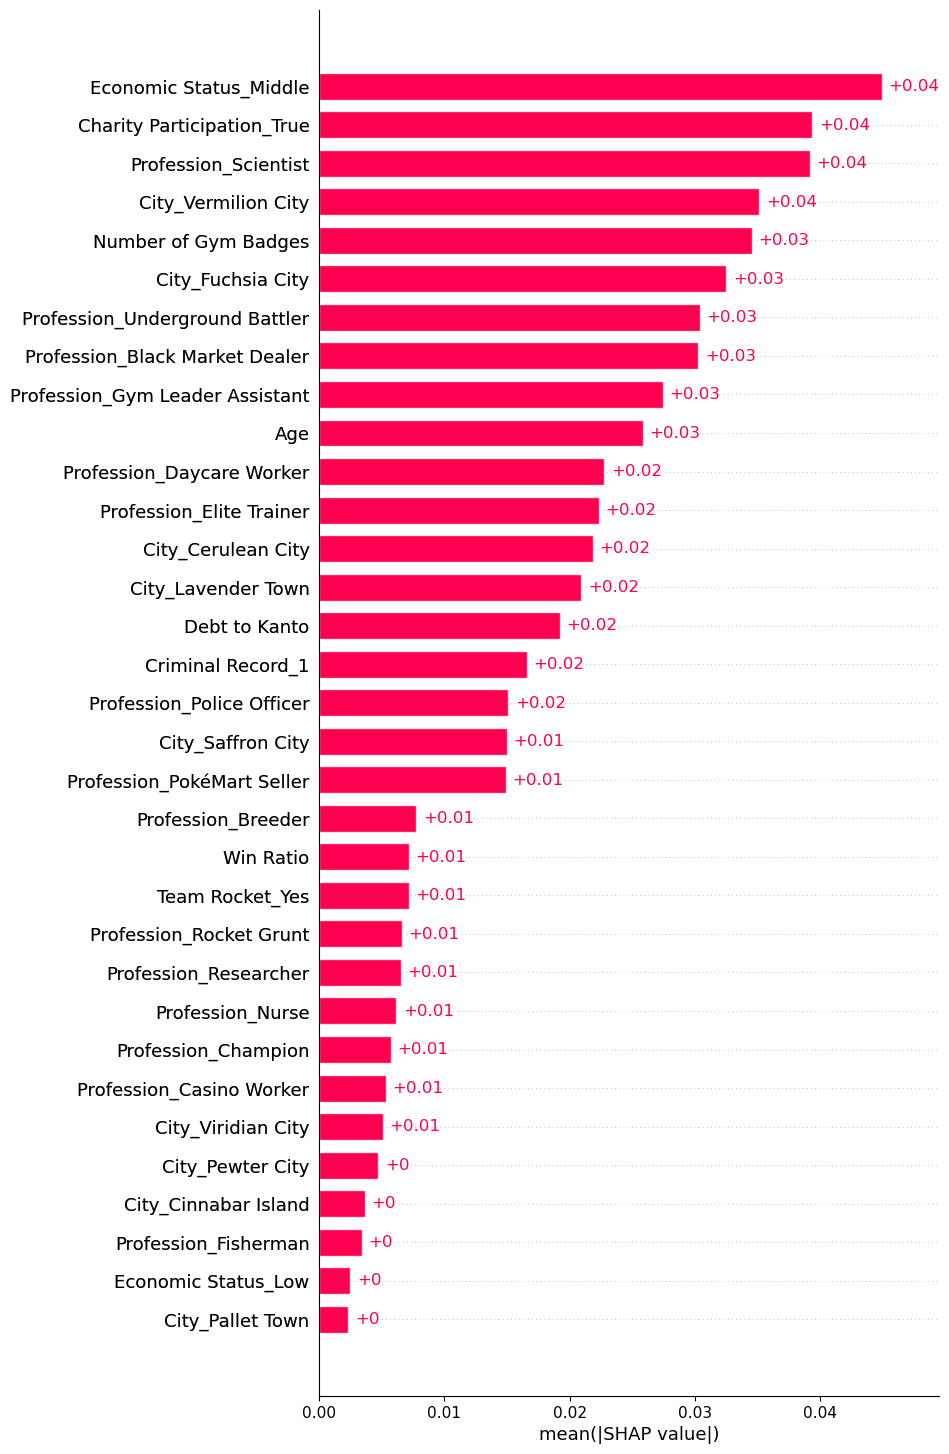

In [15]:
shap.plots.bar(shap_values_log, max_display=33)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


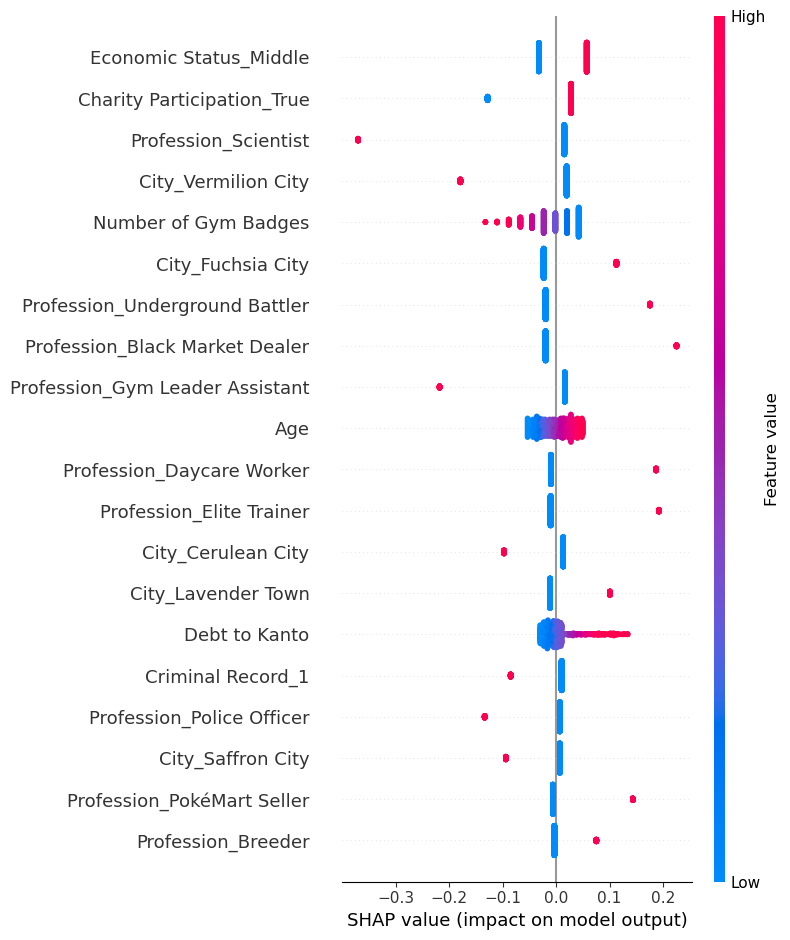

In [14]:
shap.summary_plot(shap_values_log, X_test_scaled)